# Read in the data

In [1]:
import pandas
import numpy
import re
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.basemap import Basemap

data_files = [
    "ap_2010.csv",
    "class_size.csv",
    "demographics.csv",
    "graduation.csv",
    "hs_directory.csv",
    "sat_results.csv"
]

data = {}

for f in data_files:
    d = pandas.read_csv("schools/{0}".format(f))
    data[f.replace(".csv", "")] = d

In [2]:
data

{'ap_2010':         DBN                                         SchoolName  \
 0    01M448                       UNIVERSITY NEIGHBORHOOD H.S.   
 1    01M450                             EAST SIDE COMMUNITY HS   
 2    01M515                                LOWER EASTSIDE PREP   
 3    01M539                     NEW EXPLORATIONS SCI,TECH,MATH   
 4    02M296              High School of Hospitality Management   
 5    02M298                                   Pace High School   
 6    02M300  Urban Assembly School of Design and Construction,   
 7    02M303                         Facing History School, The   
 8    02M305  Urban Assembly Academy of Government and Law, The   
 9    02M308                       Lower Manhattan Arts Academy   
 10   02M400                       HS FOR ENVIRONMENTAL STUDIES   
 11   02M408                       PROFESSIONAL PERFORMING ARTS   
 12   02M411                           BARUCH COLLEGE CAMPUS HS   
 13   02M412                       NYC LAB HS FOR C

# Read in the Surveys

In [3]:
all_survey = pandas.read_csv("schools/survey_all.txt", delimiter="\t", encoding='windows-1252')
d75_survey = pandas.read_csv("schools/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey = pandas.concat([all_survey, d75_survey], axis=0)

In [4]:
all_survey.columns

Index(['dbn', 'bn', 'schoolname', 'd75', 'studentssurveyed', 'highschool',
       'schooltype', 'rr_s', 'rr_t', 'rr_p',
       ...
       's_N_q14e_3', 's_N_q14e_4', 's_N_q14f_1', 's_N_q14f_2', 's_N_q14f_3',
       's_N_q14f_4', 's_N_q14g_1', 's_N_q14g_2', 's_N_q14g_3', 's_N_q14g_4'],
      dtype='object', length=1942)

In [5]:
all_survey.head(5)

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_N_q14e_3,s_N_q14e_4,s_N_q14f_1,s_N_q14f_2,s_N_q14f_3,s_N_q14f_4,s_N_q14g_1,s_N_q14g_2,s_N_q14g_3,s_N_q14g_4
0,01M015,M015,P.S. 015 Roberto Clemente,0,No,0.0,Elementary School,NaN,88,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M019,M019,P.S. 019 Asher Levy,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01M020,M020,P.S. 020 Anna Silver,0,No,0.0,Elementary School,NaN,88,73,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01M034,M034,P.S. 034 Franklin D. Roosevelt,0,Yes,0.0,Elementary / Middle School,89.0,73,50,...,20.0,16.0,23.0,54.0,33.0,29.0,31.0,46.0,16.0,8.0
4,01M063,M063,P.S. 063 William McKinley,0,No,0.0,Elementary School,NaN,100,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
d75_survey.head(5)

,dbn,bn,schoolname,d75,studentssurveyed,highschool,schooltype,rr_s,rr_t,rr_p,...,s_q14_2,s_q14_3,s_q14_4,s_q14_5,s_q14_6,s_q14_7,s_q14_8,s_q14_9,s_q14_10,s_q14_11
0,75K004,K004,P.S. K004,1,Yes,0.0,District 75 Special Education,38.0,90,72,...,29.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,75K036,K036,P.S. 36,1,Yes,NaN,District 75 Special Education,70.0,69,44,...,20.0,27.0,19.0,9.0,2.0,6.0,1.0,2.0,0.0,0.0
2,75K053,K053,P.S. K053,1,Yes,NaN,District 75 Special Education,94.0,97,53,...,14.0,12.0,12.0,10.0,21.0,13.0,11.0,2.0,0.0,0.0
3,75K077,K077,P.S. K077,1,Yes,NaN,District 75 Special Education,95.0,65,55,...,14.0,14.0,7.0,11.0,16.0,10.0,6.0,4.0,7.0,7.0
4,75K140,K140,P.S. K140,1,Yes,0.0,District 75 Special Education,77.0,70,42,...,35.0,34.0,17.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
survey.head(5)

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


In [8]:
survey["DBN"] = survey["dbn"]

In [9]:
survey.head(5)

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5,DBN
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0,01M015
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0,01M019
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0,01M020
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0,01M034
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0,01M063


In [10]:
survey_fields = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_10", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey.loc[:,survey_fields]

survey.head(5)

/home/ekele/.conda/envs/keras2/lib/python3.5/site-packages/ipykernel_launcher.py:26: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
/home/ekele/.conda/envs/keras2/lib/python3.5/site-packages/pandas/core/indexing.py:1367: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,DBN,rr_s,rr_t,rr_p,N_s,N_t,N_p,saf_p_11,com_p_11,eng_p_11,...,eng_t_10,aca_t_11,saf_s_11,com_s_11,eng_s_11,aca_s_11,saf_tot_11,com_tot_11,eng_tot_11,aca_tot_11
0,01M015,NaN,88,60,NaN,22.0,90.0,8.5,7.6,7.5,...,NaN,7.9,NaN,NaN,NaN,NaN,8.0,7.7,7.5,7.9
1,01M019,NaN,100,60,NaN,34.0,161.0,8.4,7.6,7.6,...,NaN,9.1,NaN,NaN,NaN,NaN,8.5,8.1,8.2,8.4
2,01M020,NaN,88,73,NaN,42.0,367.0,8.9,8.3,8.3,...,NaN,7.5,NaN,NaN,NaN,NaN,8.2,7.3,7.5,8.0
3,01M034,89.0,73,50,145.0,29.0,151.0,8.8,8.2,8.0,...,NaN,7.8,6.2,5.9,6.5,7.4,7.3,6.7,7.1,7.9
4,01M063,NaN,100,60,NaN,23.0,90.0,8.7,7.9,8.1,...,NaN,8.1,NaN,NaN,NaN,NaN,8.5,7.6,7.9,8.0


In [11]:
data['survey'] = survey

In [12]:
data.keys()

dict_keys(['survey', 'graduation', 'hs_directory', 'class_size', 'ap_2010', 'sat_results', 'demographics'])

In [13]:
data["hs_directory"]["DBN"] = data["hs_directory"]["dbn"]

In [14]:
data.keys()

dict_keys(['survey', 'graduation', 'hs_directory', 'class_size', 'ap_2010', 'sat_results', 'demographics'])

In [15]:
data["hs_directory"]["DBN"]

0      17K548
1      09X543
2      09X327
3      02M280
4      28Q680
5      08X348
6      14K474
7      02M420
8      28Q350
9      29Q313
10     12X271
11     02M520
12     06M211
13     24Q600
14     10X368
15     06M348
16     18K629
17     03M299
18     07X520
19     08X312
20     08X293
21     13K419
22     31R460
23     28Q328
24     05M362
25     10X243
26     03M307
27     20K609
28     28Q284
29     21K348
        ...  
405    24Q264
406    08X519
407    02M374
408    17K533
409    26Q415
410    31R455
411    25Q263
412    02M449
413    32K552
414    06M468
415    30Q580
416    12X684
417    22K405
418    25Q670
419    19K618
420    02M298
421    08X376
422    02M500
423    02M507
424    27Q323
425    17K408
426    12X278
427    14K558
428    02M288
429    21K468
430    10X225
431    11X508
432    11X253
433    02M316
434    25Q525
Name: DBN, Length: 435, dtype: object

In [16]:
data["hs_directory"]["dbn"]

0      17K548
1      09X543
2      09X327
3      02M280
4      28Q680
5      08X348
6      14K474
7      02M420
8      28Q350
9      29Q313
10     12X271
11     02M520
12     06M211
13     24Q600
14     10X368
15     06M348
16     18K629
17     03M299
18     07X520
19     08X312
20     08X293
21     13K419
22     31R460
23     28Q328
24     05M362
25     10X243
26     03M307
27     20K609
28     28Q284
29     21K348
        ...  
405    24Q264
406    08X519
407    02M374
408    17K533
409    26Q415
410    31R455
411    25Q263
412    02M449
413    32K552
414    06M468
415    30Q580
416    12X684
417    22K405
418    25Q670
419    19K618
420    02M298
421    08X376
422    02M500
423    02M507
424    27Q323
425    17K408
426    12X278
427    14K558
428    02M288
429    21K468
430    10X225
431    11X508
432    11X253
433    02M316
434    25Q525
Name: dbn, Length: 435, dtype: object

In [17]:
data.items()

dict_items([('survey',        DBN   rr_s  rr_t  rr_p    N_s    N_t    N_p  saf_p_11  com_p_11  \
0   01M015    NaN    88    60    NaN   22.0   90.0       8.5       7.6   
1   01M019    NaN   100    60    NaN   34.0  161.0       8.4       7.6   
2   01M020    NaN    88    73    NaN   42.0  367.0       8.9       8.3   
3   01M034   89.0    73    50  145.0   29.0  151.0       8.8       8.2   
4   01M063    NaN   100    60    NaN   23.0   90.0       8.7       7.9   
5   01M064    NaN    94    61    NaN   32.0  159.0       8.8       8.2   
6   01M110    NaN    91    79    NaN   32.0  302.0       8.4       7.6   
7   01M134    NaN    74    66    NaN   23.0  192.0       9.0       7.9   
8   01M137    NaN    67    75    NaN   14.0  145.0       8.7       8.0   
9   01M140   98.0    94    68  185.0   34.0  213.0       8.8       8.0   
10  01M142    NaN   100   100    NaN   38.0  331.0       9.1       8.0   
11  01M184   96.0    82    80  156.0   36.0  382.0       8.7       8.1   
12  01M188   82

In [18]:
import pandas as pd
d = {'one' : pd.Series([1, 2, 3], index=['a', 'b', 'c']),
      'two' : pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])}

d
#df = pd.DataFrame(d)

{'one': a    1
 b    2
 c    3
 dtype: int64, 'two': a    1
 b    2
 c    3
 d    4
 dtype: int64}

In [19]:
df = pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [20]:
data["hs_directory"]

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,DBN
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",17K548
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",09X543
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",09X327
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,Then to Manhattan students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106...",02M280
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40...",28Q680
5,08X348,Schuylerville Preparatory High School,Bronx,X405,718-904-4200,718-935-4209,9,11,9,12.0,...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"3000 East Tremont Avenue\nBronx, NY 10461\n(40...",08X348
6,14K474,PROGRESS High School for Professional Careers,Brooklyn,K450,718-387-0228,718-782-0911,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"850 Grand Street\nBrooklyn, NY 11211\n(40.7119...",14K474
7,02M420,High School for Health Professions and Human S...,Manhattan,M475,212-780-9175,212-979-7261,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"345 East 15Th Street\nNew York, NY 10003\n(40....",02M420
8,28Q350,Jamaica Gateway to the Sciences,Queens,Q470,718-480-2689,718-480-2697,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"167-01 Gothic Drive\nJamaica, NY 11432\n(40.71...",28Q350
9,29Q313,Benjamin Franklin High School for Finance & In...,Queens,Q490,718-935-3645,NaN,9,10,9,12.0,...,Then to Queens students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"207-01 116th Avenue\nCambria Heights, NY 11411...",29Q313


In [21]:
data.keys()

dict_keys(['survey', 'graduation', 'hs_directory', 'class_size', 'ap_2010', 'sat_results', 'demographics'])

In [22]:
data['demographics']

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4
5,01M015,P.S. 015 ROBERTO CLEMENTE,20102011,,96.5,203,13,37,35,33,...,75,36.9,110,54.2,4,2.0,113.0,55.7,90.0,44.3
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7
7,01M019,P.S. 019 ASHER LEVY,20052006,61.5,NaN,402,15,43,55,53,...,103,25.6,207,51.5,39,9.7,214.0,53.2,188.0,46.8
8,01M019,P.S. 019 ASHER LEVY,20062007,61.5,NaN,312,13,37,45,52,...,70,22.4,172,55.1,19,6.1,157.0,50.3,155.0,49.7
9,01M019,P.S. 019 ASHER LEVY,20072008,61.5,NaN,338,28,48,46,47,...,72,21.3,186,55.0,22,6.5,162.0,47.9,176.0,52.1


### Add DBN columns for class_size data

In [23]:
def pad_csd(num):
    string_representation = str(num)
    if len(string_representation) > 1:
        return string_representation
    else:
        return "0" + string_representation
    
#data['class_size']['padded_csd'] = data['class_size']['CSD'].apply(pad_csd)
data['class_size']['CSD']

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
27581    32
27582    32
27583    32
27584    32
27585    32
27586    32
27587    32
27588    32
27589    32
27590    32
27591    32
27592    32
27593    32
27594    32
27595    32
27596    32
27597    32
27598    32
27599    32
27600    32
27601    32
27602    32
27603    32
27604    32
27605    32
27606    32
27607    32
27608    32
27609    32
27610    32
Name: CSD, Length: 27611, dtype: int64

In [24]:
data['class_size']['padded_csd'] = data['class_size']['CSD'].apply(pad_csd)
data['class_size']['padded_csd']

0        01
1        01
2        01
3        01
4        01
5        01
6        01
7        01
8        01
9        01
10       01
11       01
12       01
13       01
14       01
15       01
16       01
17       01
18       01
19       01
20       01
21       01
22       01
23       01
24       01
25       01
26       01
27       01
28       01
29       01
         ..
27581    32
27582    32
27583    32
27584    32
27585    32
27586    32
27587    32
27588    32
27589    32
27590    32
27591    32
27592    32
27593    32
27594    32
27595    32
27596    32
27597    32
27598    32
27599    32
27600    32
27601    32
27602    32
27603    32
27604    32
27605    32
27606    32
27607    32
27608    32
27609    32
27610    32
Name: padded_csd, Length: 27611, dtype: object

In [25]:
data["class_size"]["SCHOOL CODE"]

0        M015
1        M015
2        M015
3        M015
4        M015
5        M015
6        M015
7        M015
8        M015
9        M015
10       M015
11       M015
12       M019
13       M019
14       M019
15       M019
16       M019
17       M019
18       M019
19       M019
20       M019
21       M019
22       M019
23       M019
24       M019
25       M020
26       M020
27       M020
28       M020
29       M020
         ... 
27581    K556
27582    K556
27583    K556
27584    K556
27585    K556
27586    K556
27587    K556
27588    K556
27589    K556
27590    K556
27591    K556
27592    K556
27593    K556
27594    K556
27595    K564
27596    K564
27597    K564
27598    K564
27599    K564
27600    K564
27601    K564
27602    K564
27603    K564
27604    K564
27605    K564
27606    K564
27607    K564
27608    K564
27609    K564
27610    K564
Name: SCHOOL CODE, Length: 27611, dtype: object

In [26]:
data["class_size"]["DBN"] = data["class_size"]["padded_csd"] + data["class_size"]["SCHOOL CODE"]
data["class_size"]["DBN"]

0        01M015
1        01M015
2        01M015
3        01M015
4        01M015
5        01M015
6        01M015
7        01M015
8        01M015
9        01M015
10       01M015
11       01M015
12       01M019
13       01M019
14       01M019
15       01M019
16       01M019
17       01M019
18       01M019
19       01M019
20       01M019
21       01M019
22       01M019
23       01M019
24       01M019
25       01M020
26       01M020
27       01M020
28       01M020
29       01M020
          ...  
27581    32K556
27582    32K556
27583    32K556
27584    32K556
27585    32K556
27586    32K556
27587    32K556
27588    32K556
27589    32K556
27590    32K556
27591    32K556
27592    32K556
27593    32K556
27594    32K556
27595    32K564
27596    32K564
27597    32K564
27598    32K564
27599    32K564
27600    32K564
27601    32K564
27602    32K564
27603    32K564
27604    32K564
27605    32K564
27606    32K564
27607    32K564
27608    32K564
27609    32K564
27610    32K564
Name: DBN, Length: 27611

In [27]:
data.keys()

dict_keys(['survey', 'graduation', 'hs_directory', 'class_size', 'ap_2010', 'sat_results', 'demographics'])

## Convert columns to numeric

In [28]:
cols = ['SAT Math Avg. Score', 'SAT Critical Reading Avg. Score', 'SAT Writing Avg. Score']
for c in cols:
    data['sat_results'][c] = pd.to_numeric(data['sat_results'][c], errors = "coerce")

data['sat_results']['sat_score'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]

data["hs_directory"]["Location 1"]

0      883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...
1      1110 Boston Road\nBronx, NY 10456\n(40.8276026...
2      1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...
3      411 Pearl Street\nNew York, NY 10038\n(40.7106...
4      160-20 Goethals Avenue\nJamaica, NY 11432\n(40...
5      3000 East Tremont Avenue\nBronx, NY 10461\n(40...
6      850 Grand Street\nBrooklyn, NY 11211\n(40.7119...
7      345 East 15Th Street\nNew York, NY 10003\n(40....
8      167-01 Gothic Drive\nJamaica, NY 11432\n(40.71...
9      207-01 116th Avenue\nCambria Heights, NY 11411...
10     1716 Southern Boulevard\nBronx, NY 10460\n(40....
11     411 Pearl Street\nNew York, NY 10038\n(40.7106...
12     650 Academy Street\nNew York, NY 10002\n(40.86...
13     37-02 47 Avenue\nLong Island City, NY 11101\n(...
14     2975 Tibbett Avenue\nBronx, NY 10463\n(40.8800...
15     511 West 182Nd Street\nNew York, NY 10033\n(40...
16     5800 Tilden Avenue\nBrooklyn, NY 11203\n(40.64...
17     122 Amsterdam Avenue\nNe

In [29]:
def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    return coords

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lat"]

0       [(40.67029890700047, -73.96164787599963)]
1        [(40.8276026690005, -73.90447525699966)]
2      [(40.842414068000494, -73.91616158599965)]
3       [(40.71067947100045, -74.00080702099967)]
4      [(40.718810094000446, -73.80650045499965)]
5      [(40.840513977000455, -73.83812095999963)]
6       [(40.71196311300048, -73.94043436699963)]
7       [(40.73248537800049, -73.98305338799963)]
8      [(40.713577459000476, -73.79651782499963)]
9        [(40.6978073300005, -73.74585775499963)]
10      [(40.83695342600049, -73.88796175799968)]
11      [(40.71067947100045, -74.00080702099967)]
12      [(40.86604554900049, -73.92485664199967)]
13      [(40.74218869400045, -73.92824329199965)]
14      [(40.88005009300048, -73.90920904799964)]
15      [(40.84887878800049, -73.93080651699967)]
16      [(40.64866366300049, -73.92189876199967)]
17      [(40.77429641100048, -73.98482270099964)]
18      [(40.81113885600047, -73.90978712699967)]
19      [(40.82230376500047, -73.85596138999966)]


In [30]:
def find_lat(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

data["hs_directory"]["lat"] = data["hs_directory"]["Location 1"].apply(find_lat)
data["hs_directory"]["lat"]

0       40.67029890700047
1        40.8276026690005
2      40.842414068000494
3       40.71067947100045
4      40.718810094000446
5      40.840513977000455
6       40.71196311300048
7       40.73248537800049
8      40.713577459000476
9        40.6978073300005
10      40.83695342600049
11      40.71067947100045
12      40.86604554900049
13      40.74218869400045
14      40.88005009300048
15      40.84887878800049
16      40.64866366300049
17      40.77429641100048
18      40.81113885600047
19      40.82230376500047
20     40.840513977000455
21      40.69717472700046
22      40.59865238600048
23     40.713577459000476
24      40.81091785300049
25      40.86001222100049
26      40.77429641100048
27      40.63490809500047
28      40.69693735800047
29      40.59359381100046
              ...        
405     40.74509351900048
406     40.82117077000049
407     40.73551946300046
408      40.6595170060005
409     40.75239242400045
410    40.528228767000485
411    40.760414170000445
412    40.76

In [31]:
def find_lon(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data["hs_directory"]["lon"] = data["hs_directory"]["Location 1"].apply(find_lon)
data["hs_directory"]["lon"]

0      -73.96164787599963
1      -73.90447525699966
2      -73.91616158599965
3      -74.00080702099967
4      -73.80650045499965
5      -73.83812095999963
6      -73.94043436699963
7      -73.98305338799963
8      -73.79651782499963
9      -73.74585775499963
10     -73.88796175799968
11     -74.00080702099967
12     -73.92485664199967
13     -73.92824329199965
14     -73.90920904799964
15     -73.93080651699967
16     -73.92189876199967
17     -73.98482270099964
18     -73.90978712699967
19     -73.85596138999966
20     -73.83812095999963
21     -73.98495968899965
22     -74.12310475899966
23     -73.79651782499963
24     -73.95692738699967
25     -73.88822960399966
26     -73.98482270099964
27     -73.98151907699963
28     -73.78698154099965
29     -73.98472923199967
              ...        
405    -73.93681389799963
406    -73.88113634599966
407    -73.98760424899967
408    -73.94254649899966
409    -73.75608335799967
410    -74.19215369799963
411    -73.81837627799968
412    -73.9

In [32]:
data['hs_directory']['lon'] = pd.to_numeric(data['hs_directory']['lon'],errors = "coerce")
data['hs_directory']['lat'] = pd.to_numeric(data['hs_directory']['lat'],errors = "coerce")

In [33]:
data['hs_directory']['lon']

0     -73.961648
1     -73.904475
2     -73.916162
3     -74.000807
4     -73.806500
5     -73.838121
6     -73.940434
7     -73.983053
8     -73.796518
9     -73.745858
10    -73.887962
11    -74.000807
12    -73.924857
13    -73.928243
14    -73.909209
15    -73.930807
16    -73.921899
17    -73.984823
18    -73.909787
19    -73.855961
20    -73.838121
21    -73.984960
22    -74.123105
23    -73.796518
24    -73.956927
25    -73.888230
26    -73.984823
27    -73.981519
28    -73.786982
29    -73.984729
         ...    
405   -73.936814
406   -73.881136
407   -73.987604
408   -73.942546
409   -73.756083
410   -74.192154
411   -73.818376
412   -73.960214
413   -73.910816
414   -73.927030
415   -73.926824
416   -73.875418
417   -73.952916
418   -73.810721
419   -73.868426
420   -73.992676
421   -73.855961
422   -73.981010
423   -73.990509
424   -73.825681
425   -73.958431
426   -73.893950
427   -73.954650
428   -73.992517
429   -73.984729
430   -73.896646
431   -73.860741
432   -73.8613

In [34]:
data['hs_directory'].head(5)

,dbn,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,DBN,lat,lon
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67...",17K548,40.670299,-73.961648
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026...",09X543,40.827603,-73.904475
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241...",09X327,40.842414,-73.916162
3,02M280,Manhattan Early College School for Advertising,Manhattan,M520,718-935-3477,NaN,9,10,9,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,"411 Pearl Street\nNew York, NY 10038\n(40.7106...",02M280,40.710679,-74.000807
4,28Q680,Queens Gateway to Health Sciences Secondary Sc...,Queens,Q695,718-969-3155,718-969-3552,6,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"160-20 Goethals Avenue\nJamaica, NY 11432\n(40...",28Q680,40.718810,-73.806500


## Condense datasets

In [35]:
class_size = data["class_size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

class_size = class_size.groupby("DBN").agg(numpy.mean)
class_size.reset_index(inplace=True)
data["class_size"] = class_size

data["demographics"] = data["demographics"][data["demographics"]["schoolyear"] == 20112012]

data["graduation"] = data["graduation"][data["graduation"]["Cohort"] == "2006"]
data["graduation"] = data["graduation"][data["graduation"]["Demographic"] == "Total Cohort"]
data["class_size"].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


In [36]:
data['class_size'].head(5)

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


## Convert AP Scores to numeric 

In [38]:
data['ap_2010'].head(5)

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39,49,10
1,01M450,EAST SIDE COMMUNITY HS,19,21,s
2,01M515,LOWER EASTSIDE PREP,24,26,24
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255,377,191
4,02M296,High School of Hospitality Management,s,s,s


In [39]:
cols = ['AP Test Takers ','Total Exams Taken','Number of Exams with scores 3 4 or 5']
for c in cols:
    data['ap_2010'][c] = pd.to_numeric(data['ap_2010'][c],errors="coerce")

In [40]:
data['sat_results'].head(5)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0,1174.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0


In [44]:
combined = data['sat_results']

combined = combined.merge(data["ap_2010"], on="DBN", how="left")
combined = combined.merge(data["graduation"], on="DBN", how="left")

to_merge = ["class_size", "demographics", "survey", "hs_directory"]

for m in to_merge:
    combined = combined.merge(data[m], on="DBN", how="inner")
    
combined = combined.fillna(combined.mean())
combined = combined.fillna(0)
combined

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_score,SchoolName,AP Test Takers,Total Exams Taken,...,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1,lat,lon
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.000000,404.000000,363.000000,1122.000000,0,129.028846,197.038462,...,Then to Manhattan students or residents,Then to New York City residents,0,0,0,0,0,"220 Henry Street\nNew York, NY 10002\n(40.7137...",40.713764,-73.985260
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.000000,423.000000,366.000000,1172.000000,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,0,0,0,0,0,0,0,"200 Monroe Street\nNew York, NY 10002\n(40.712...",40.712332,-73.984797
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.000000,402.000000,370.000000,1149.000000,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,0,0,0,0,0,0,0,"420 East 12 Street\nNew York, NY 10009\n(40.72...",40.729783,-73.983041
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.000000,433.000000,384.000000,1207.000000,0,129.028846,197.038462,...,0,0,0,0,0,0,0,"145 Stanton Street\nNew York, NY 10002\n(40.72...",40.720569,-73.985673
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.000000,574.000000,525.000000,1621.000000,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,0,0,0,0,0,0,0,"111 Columbia Street\nNew York, NY 10002\n(40.7...",40.718725,-73.979426
5,01M696,BARD HIGH SCHOOL EARLY COLLEGE,130,624.000000,604.000000,628.000000,1856.000000,0,129.028846,197.038462,...,0,0,0,0,0,0,0,"525 East Houston Street\nNew York, NY 10002\n(...",40.718962,-73.976066
6,02M047,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,16,395.000000,400.000000,387.000000,1182.000000,0,129.028846,197.038462,...,0,0,0,0,0,0,0,"223 East 23 Street\nNew York, NY 10010\n(40.73...",40.738599,-73.982512
7,02M288,FOOD AND FINANCE HIGH SCHOOL,62,409.000000,393.000000,392.000000,1194.000000,0,129.028846,197.038462,...,0,0,0,0,0,0,0,"525 West 50Th Street\nNew York, NY 10019\n(40....",40.765027,-73.992517
8,02M294,ESSEX STREET ACADEMY,53,394.000000,384.000000,378.000000,1156.000000,0,129.028846,197.038462,...,0,0,0,0,0,0,0,"350 Grand Street\nNew York, NY 10002\n(40.7168...",40.716867,-73.989532
9,02M296,HIGH SCHOOL OF HOSPITALITY MANAGEMENT,58,374.000000,375.000000,362.000000,1111.000000,High School of Hospitality Management,129.028846,197.038462,...,0,0,0,0,0,0,0,"525 West 50Th Street\nNew York, NY 10019\n(40....",40.765027,-73.992517


## Add School District

In [45]:
def get_first_two_chars(dbn):
    return dbn[0:2]

combined['district'] = combined["DBN"].apply(get_first_two_chars)

## Find Correlation

In [46]:
correlations = combined.corr()
correlations = correlations['sat_score']
pandas.DataFrame(correlations.sort_values())

,sat_score
frl_percent,-0.722225
sped_percent,-0.448170
ell_percent,-0.398750
hispanic_per,-0.396985
black_per,-0.284139
ell_num,-0.153778
lon,-0.132222
lat,-0.121029
com_p_11,-0.115073
male_per,-0.112062


In [47]:
correlations.keys

<bound method Series.keys of SAT Critical Reading Avg. Score         0.986820
SAT Math Avg. Score                     0.972643
SAT Writing Avg. Score                  0.987771
sat_score                               1.000000
AP Test Takers                          0.523140
Total Exams Taken                       0.514333
Number of Exams with scores 3 4 or 5    0.463245
Total Cohort                            0.325144
CSD                                     0.042948
NUMBER OF STUDENTS / SEATS FILLED       0.394626
NUMBER OF SECTIONS                      0.362673
AVERAGE CLASS SIZE                      0.381014
SIZE OF SMALLEST CLASS                  0.249949
SIZE OF LARGEST CLASS                   0.314434
SCHOOLWIDE PUPIL-TEACHER RATIO               NaN
schoolyear                                   NaN
fl_percent                                   NaN
frl_percent                            -0.722225
total_enrollment                        0.367857
ell_num                                -

/home/ekele/.conda/envs/keras2/lib/python3.5/site-packages/pandas/core/series.py:705: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


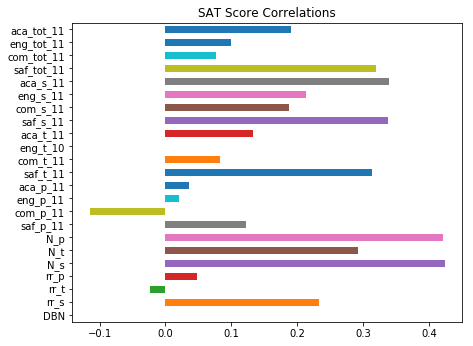

In [49]:
correlations[survey_fields].plot(kind='barh',figsize=(7,5.5),title="SAT Score Correlations")

/home/ekele/.conda/envs/keras2/lib/python3.5/site-packages/pandas/core/series.py:705: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


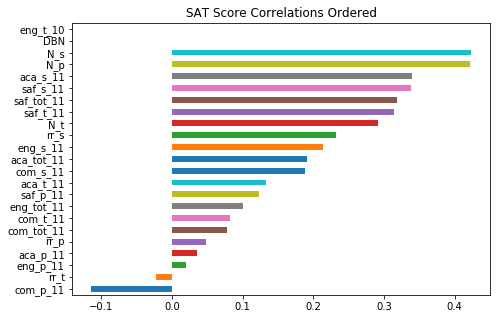

In [54]:
correlations[survey_fields].sort_values().plot(kind='barh',figsize=(7.5,5),title='SAT Score Correlations Ordered')

## Investigating Safety Scores

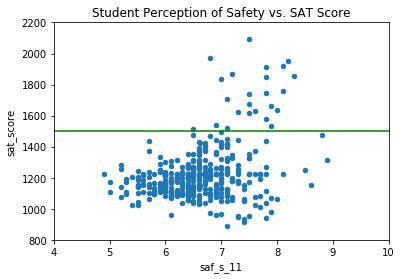

In [56]:
combined.plot.scatter(x='saf_s_11', y='sat_score', title="Student Perception of Safety vs. SAT Score")
plt.plot(numpy.arange(4,11), [1500]*len(numpy.arange(4,11)), c='green')
plt.axis([4, 10, 800, 2200])
plt.show()

In [58]:
combined.items

<bound method DataFrame.iteritems of         DBN                                        SCHOOL NAME  \
0    01M292      HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES   
1    01M448                UNIVERSITY NEIGHBORHOOD HIGH SCHOOL   
2    01M450                         EAST SIDE COMMUNITY SCHOOL   
3    01M509                            MARTA VALLE HIGH SCHOOL   
4    01M539  NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...   
5    01M696                     BARD HIGH SCHOOL EARLY COLLEGE   
6    02M047  47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...   
7    02M288                       FOOD AND FINANCE HIGH SCHOOL   
8    02M294                               ESSEX STREET ACADEMY   
9    02M296              HIGH SCHOOL OF HOSPITALITY MANAGEMENT   
10   02M298                                   PACE HIGH SCHOOL   
11   02M300  URBAN ASSEMBLY SCHOOL OF DESIGN AND CONSTRUCTI...   
12   02M303                         FACING HISTORY SCHOOL, THE   
13   02M305  URBAN ASSEMBLY ACADEMY OF 

/home/ekele/.conda/envs/keras2/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/ekele/.conda/envs/keras2/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/ekele/.conda/envs/keras2/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ekele/.conda/envs/keras2/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


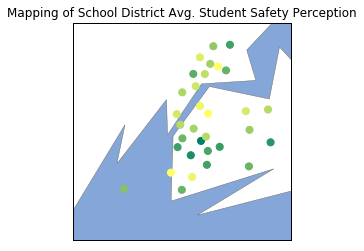

In [65]:
district_avgs = combined.groupby('district').aggregate(numpy.mean)
district_avgs.reset_index(inplace=True)

m = Basemap(
    projection='merc',
    resolution='l',
    llcrnrlat=40.496044, 
    urcrnrlat=40.915256, 
    llcrnrlon=-74.255735, 
    urcrnrlon=-73.700272)
m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines(color='#6D5F47', linewidth=.4)
m.drawrivers(color='#6D5F47', linewidth=.4)
m.fillcontinents(color='#FFFFFF', lake_color='#85A6D9')

lons = district_avgs['lon'].tolist()
lats = district_avgs['lat'].tolist()
m.scatter(lons, lats, latlon=True, s=50, zorder=2, cmap='summer',
         c=district_avgs['saf_s_11'])
plt.title("Mapping of School District Avg. Student Safety Perception")
plt.show()

In [62]:
combined['district']

0      01
1      01
2      01
3      01
4      01
5      01
6      02
7      02
8      02
9      02
10     02
11     02
12     02
13     02
14     02
15     02
16     02
17     02
18     02
19     02
20     02
21     02
22     02
23     02
24     02
25     02
26     02
27     02
28     02
29     02
       ..
333    29
334    29
335    29
336    29
337    29
338    30
339    30
340    30
341    30
342    30
343    30
344    30
345    30
346    30
347    31
348    31
349    31
350    31
351    31
352    31
353    31
354    31
355    31
356    31
357    32
358    32
359    32
360    32
361    32
362    32
Name: district, Length: 363, dtype: object

## Race and SAT Scores

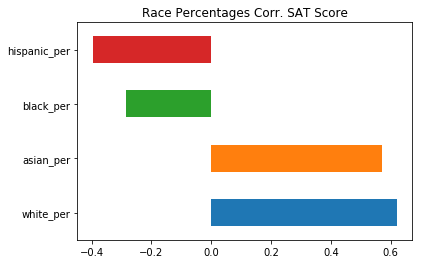

In [67]:
race_fields = ['white_per','asian_per','black_per','hispanic_per']
race_corr = combined.corr()['sat_score'][race_fields].plot(kind='barh',title='Race Percentages Corr. SAT Score')

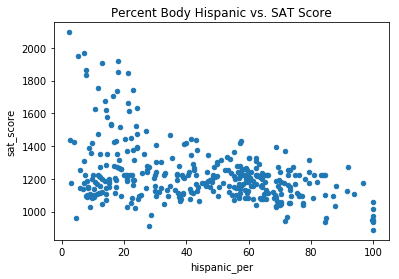

In [68]:
combined.plot.scatter(x='hispanic_per',y='sat_score',title='Percent Body Hispanic vs. SAT Score')

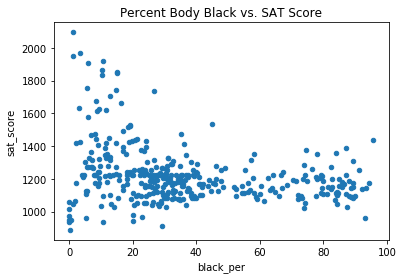

In [69]:
combined.plot.scatter(x='black_per',y='sat_score',title='Percent Body Black vs. SAT Score')

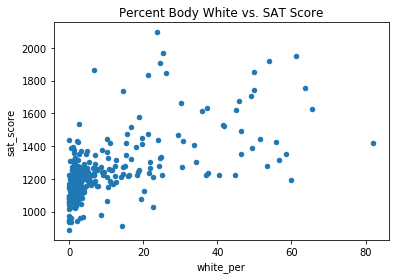

In [70]:
combined.plot.scatter(x='white_per',y='sat_score',title='Percent Body White vs. SAT Score')

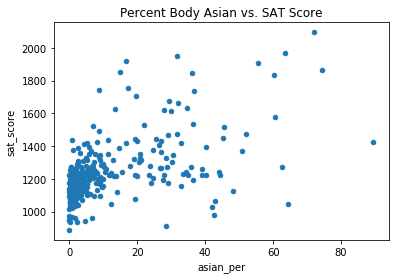

In [71]:
combined.plot.scatter(x='asian_per',y='sat_score',title='Percent Body Asian vs. SAT Score')

In [72]:
pandas.DataFrame(combined[combined['hispanic_per'] > 99]['SCHOOL NAME'])

,SCHOOL NAME
44,MANHATTAN BRIDGES HIGH SCHOOL
89,GREGORIO LUPERON HIGH SCHOOL FOR SCIENCE AND M...
125,ACADEMY FOR LANGUAGE AND TECHNOLOGY
141,INTERNATIONAL SCHOOL FOR LIBERAL ARTS
176,PAN AMERICAN INTERNATIONAL HIGH SCHOOL AT MONROE
253,MULTICULTURAL HIGH SCHOOL
286,PAN AMERICAN INTERNATIONAL HIGH SCHOOL


In [73]:
pandas.DataFrame(combined[(combined['hispanic_per'] < 10) & (combined['sat_score'] > 1800)]['SCHOOL NAME'])

,SCHOOL NAME
37,STUYVESANT HIGH SCHOOL
151,BRONX HIGH SCHOOL OF SCIENCE
187,BROOKLYN TECHNICAL HIGH SCHOOL
327,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...
356,STATEN ISLAND TECHNICAL HIGH SCHOOL


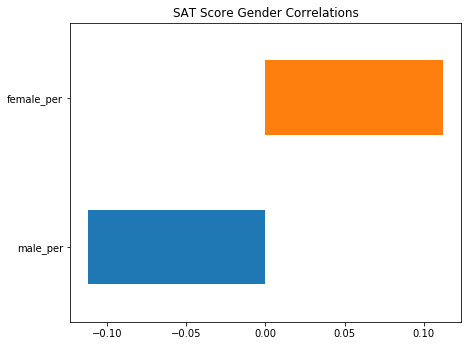

In [74]:
correlations[['male_per','female_per']].plot(kind='barh',figsize=(7,5.5),title="SAT Score Gender Correlations")

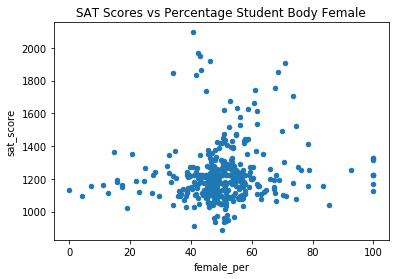

In [75]:
combined.plot.scatter(x='female_per',y='sat_score',title='SAT Scores vs Percentage Student Body Female')

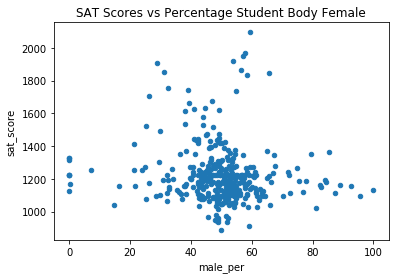

In [76]:
combined.plot.scatter(x='male_per',y='sat_score',title='SAT Scores vs Percentage Student Body Female')

In [77]:
pandas.DataFrame(combined[(combined['female_per'] < 60) & (combined['sat_score'] > 1700)][['SCHOOL NAME','sat_score']])

,SCHOOL NAME,sat_score
37,STUYVESANT HIGH SCHOOL,2096.0
79,"HIGH SCHOOL FOR MATHEMATICS, SCIENCE AND ENGIN...",1847.0
151,BRONX HIGH SCHOOL OF SCIENCE,1969.0
155,HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE,1920.0
187,BROOKLYN TECHNICAL HIGH SCHOOL,1833.0
198,"BROOKLYN LATIN SCHOOL, THE",1740.0
327,QUEENS HIGH SCHOOL FOR THE SCIENCES AT YORK CO...,1868.0
356,STATEN ISLAND TECHNICAL HIGH SCHOOL,1953.0


In [78]:
pandas.DataFrame(combined[(combined['male_per'] < 60) & (combined['sat_score'] > 1700)][['SCHOOL NAME','sat_score']])

,SCHOOL NAME,sat_score
5,BARD HIGH SCHOOL EARLY COLLEGE,1856.0
26,ELEANOR ROOSEVELT HIGH SCHOOL,1758.0
37,STUYVESANT HIGH SCHOOL,2096.0
60,BEACON HIGH SCHOOL,1744.0
61,FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...,1707.0
151,BRONX HIGH SCHOOL OF SCIENCE,1969.0
155,HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE,1920.0
187,BROOKLYN TECHNICAL HIGH SCHOOL,1833.0
198,"BROOKLYN LATIN SCHOOL, THE",1740.0
302,TOWNSEND HARRIS HIGH SCHOOL,1910.0


In [80]:
pandas.DataFrame(combined[(combined['female_per'] < 95) & (combined['sat_score'] < 1400)][['SCHOOL NAME','sat_score']])

,SCHOOL NAME,sat_score
0,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,1122.000000
1,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,1172.000000
2,EAST SIDE COMMUNITY SCHOOL,1149.000000
3,MARTA VALLE HIGH SCHOOL,1207.000000
6,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,1182.000000
7,FOOD AND FINANCE HIGH SCHOOL,1194.000000
8,ESSEX STREET ACADEMY,1156.000000
9,HIGH SCHOOL OF HOSPITALITY MANAGEMENT,1111.000000
10,PACE HIGH SCHOOL,1293.000000
11,URBAN ASSEMBLY SCHOOL OF DESIGN AND CONSTRUCTI...,1269.000000


In [81]:
pandas.DataFrame(combined[(combined['male_per'] < 95) & (combined['sat_score'] < 1400)][['SCHOOL NAME','sat_score']])

,SCHOOL NAME,sat_score
0,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,1122.000000
1,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,1172.000000
2,EAST SIDE COMMUNITY SCHOOL,1149.000000
3,MARTA VALLE HIGH SCHOOL,1207.000000
6,47 THE AMERICAN SIGN LANGUAGE AND ENGLISH SECO...,1182.000000
7,FOOD AND FINANCE HIGH SCHOOL,1194.000000
8,ESSEX STREET ACADEMY,1156.000000
9,HIGH SCHOOL OF HOSPITALITY MANAGEMENT,1111.000000
10,PACE HIGH SCHOOL,1293.000000
11,URBAN ASSEMBLY SCHOOL OF DESIGN AND CONSTRUCTI...,1269.000000


## AP Scores and SAT Scores

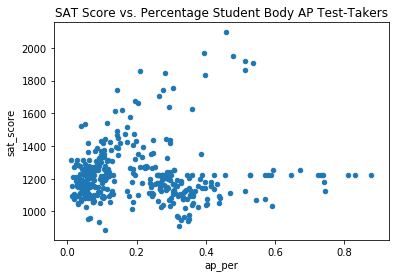

In [82]:
combined['ap_per'] = combined['AP Test Takers '] / combined['total_enrollment']
combined.plot.scatter(x='ap_per',y='sat_score',title='SAT Score vs. Percentage Student Body AP Test-Takers')